<a href="https://colab.research.google.com/github/bruno2siqueira/Machine_Learning/blob/main/AM_Tarefa2_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tarefa 2: implementação de um classificador linear**
<br>Por: Bruno Siqueira da Silva

Importanto conjunto de dados (dogs_cats.csv)








In [ ]:
import numpy as np
import pandas as pd
dados = pd.read_csv("dogs_cats.csv") #dataset
#dados.head(1) # mostra a linha 0 do dataset
#dados.shape   # mostra qtd de linhas e colunas

Capturando as características (features) dos animais (gato ou cachorro), onde:

*   **x** corresponde aos valores da coluna **comprimento**
*   **y** corresponde aos valores da coluna **peso**




In [ ]:
x = dados.iloc[:,1].values #coluna comprimento
y = dados.iloc[:,2].values #coluna peso

Exibindo conjunto de dados em um gráfico de dispersão

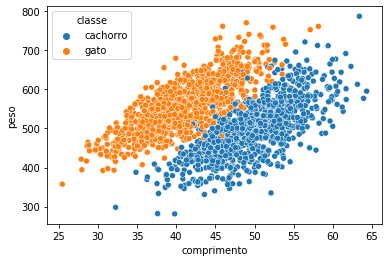

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=dados, x='comprimento', y='peso', hue='classe')

A distribuição de pontos do gráfico acima foi gerada pelo programa scatter_plot3.py. A partir de uma distribuição de pontos é possível ajustar uma curva teórica aos pontos. No gráfico acima podemos classificar o conjunto de dados, separando as duas classes do problema: gato e cachorro. Nesse caso, temos uma situação em que não sabemos a reta, ou a curva que melhor se ajusta a uma dispersão de pontos. A biblioteca NumPy tem a função **np.polyfit(x,y, n)**, que determina um polinômio de grau n, que melhor explica os pontos dos arrays x e y. 

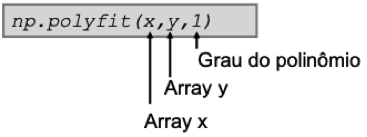

Outra função da biblioteca NumPy é a np.poly1d(), que gera um polinômio, a partir dos coeficientes dados como argumento. Usado após a função z = np.polyfit(x,y, 1), a função p = np.poly1d(z), retorna o polinômio que foi obtido para o ajuste da curva.

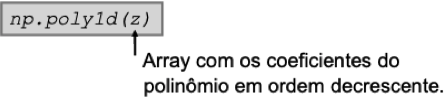

Desta forma, o valor de **p** retorna o valor da equação da reta (hiperplano)













In [ ]:
z = np.polyfit(x,y,1)
p = np.poly1d(z)
print("Equação da Reta: ",p)

Equação da Reta:   
14 x - 119


Abaixo temos informações sobre a reta obtida e o gráfico gerado.

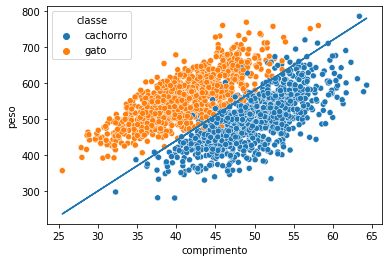

In [ ]:
import seaborn as sns
sns.scatterplot(data=dados, x='comprimento', y='peso', hue='classe')
y = 14*x -119
plt.plot(x,y)

Gerando dados de treino

In [ ]:
#convertendo dados para formato numérico
dados['classe'] = dados['classe'].replace('cachorro', 0) 
dados['classe'] = dados['classe'].replace('gato', 1)
x_treino = dados.iloc[:,1:3].values # array comprimento+peso: Valores de treino, são as features do conjunto de dados
y_treino = dados.iloc[:,3].values # array 0 = cachorro, 1: Valores alvo (rótulos de classe na classificação)
y_treino # mostra array

array([0, 1, 0, ..., 1, 0, 1])

Instalando recurso para exibir matrix de confusão

In [ ]:
!pip install scikit-plot

Gerando Modelo

In [ ]:
#criando modelo
from sklearn.svm import SVC
modelo = SVC() #modelo sem nenhum valor
modelo.fit(x_treino, y_treino) #treinando os dados x_treino (features), y_treino (rótulos)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predizendo valores com base nos dados de treino

In [ ]:
prev = modelo.predict(x_treino) #devolve o conjunto 
prev

array([0, 1, 0, ..., 1, 0, 1])

Exibindo Resultados

Acurácia: 0.9235


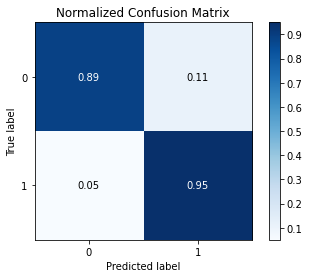

In [ ]:
from sklearn import metrics
import scikitplot as skplt
print ('Acurácia:', metrics.accuracy_score(y_treino, prev))
skplt.metrics.plot_confusion_matrix(y_treino, prev, normalize=True)

Mostrando resultados (2)

In [ ]:
print (pd.crosstab(y_treino, prev, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0     1   All
Real                    
0        894   106  1000
1         47   953  1000
All      941  1059  2000


Mostrando resultados (3)

In [ ]:
print("Relatório de Classificação:\n",metrics.classification_report(y_treino,prev))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1000
           1       0.90      0.95      0.93      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

